# Comparing the Metrics of Different Scikit-Learn Models

***Important: when comparing different models, they must be compared on the same data splits.
For example, say there is `model_1` and `model_2` which differ slightly.
To compare and evaluate their results, `model_1` and `model_2` should be trained on the same data (i.e. `X_train` and `y_train) and their predictions should each be made on the same data.
* `model_1.fit(X_train, y_train)` -> `model_1.predit(X_test)` -> `model_1_preds`
* `model_2.fit(X_train, y_train)` -> `model_2.predit(X_test)` -> `model_2_preds`

This notebook compares 3 different models on a small dataset.
1. A baseline `RandomForestClassifier` (defaul parameters used).
2. A `RandomForestClassifier` tuned with `RandomizedSearchCV` (`refit = True`).
3. A `RandomFOrestClassifier` tuned with `GridSearchCV` (`refit = True)`).

These three models all use the same data splits created using `train_test_split()` and `np.random.seed(42)`

## Import and Split the Data into Datasets

In [26]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Read the csv file
heart_disease = pd.read_csv('_Data/heart_disease.csv')

# Split the data into datasets
X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Split the data into training (80%) and test (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
# Create a function to evaluate predictions
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pres labels on a classification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': round(accuracy, 2),
                   'precision': round(precision, 2),
                   'recall': round(recall, 2),
                   'f1': round(f1, 2)
                  }
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    
    return metric_dict  

## Baseline Model

In [27]:
# Set a seed so that results are reproduceable
np.random.seed(42)

# Instantiate a RandomForestClassifier and fit model on the training data
clf = RandomForestClassifier().fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_test)

# Evaluae the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)
baseline_metrics

Accuracy: 81.97%
Precision: 0.84
Recall: 0.86
F1 Score: 0.85


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.86, 'f1': 0.85}

## RandomizedSearchCV Model

Finding hyperparameters using RandomizedSearchCV.

**NOTE:** Although best parameters are found on different splits of `X_train` and `y_train`, because `refit = Ture`, once the best parameters are found, they are refit to the entire set of `X_train` and `y_train`.

In [28]:
# Import relevant library 
from sklearn.model_selection import RandomizedSearchCV

# Create a dictionary of hyperparameters to adjust
grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = grid,
                            n_iter = 10,        # number of models to try
                            cv = 5,             # 5-fold cross validation (validation data is automatically 
                                                # created in this model type)
                            verbose = 2,
                            random_state = 42,  # set seed for reproduceability
                            refit = True)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);                # will run 50 times (n_iter * cv)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   44.1s finished


In [29]:
rs_clf.best_params_      # Returns the iteration and hyperparameters that give the best cross-validation results

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30}

In [30]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predicitions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 83.61%
Precision: 0.86
Recall: 0.86
F1 Score: 0.86


## GridSearchCV
Finding the best hyperparameters using `GridSearchCV`.

**NOTE:** Although best parameters are found on different splits of `X_train` and `y_train`, because `refit = Ture`, once the best parameters are found, they are refit to the entire set of `X_train` and `y_train`.

In [31]:
# Reduce the search space of hyperparameter based on the results of '.best_params_' 
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [32]:
# Import relevant library 
from sklearn.model_selection import GridSearchCV

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs = 1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                      param_grid = grid_2,
                      cv = 5,          # 5-fold cross validation (validation data is automatically 
                                       # created in this model type)
                      verbose = 2,
                      refit = True)    # refits the best model on the full dataset

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);         

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   22.9s finished


In [33]:
gs_clf.best_params_         # Returns the best combination of hyperparameters

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [34]:
# Make predictions
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 81.97%
Precision: 0.84
Recall: 0.86
F1 Score: 0.85


## Compare Metrics
Compare all of the found metrics between the models.

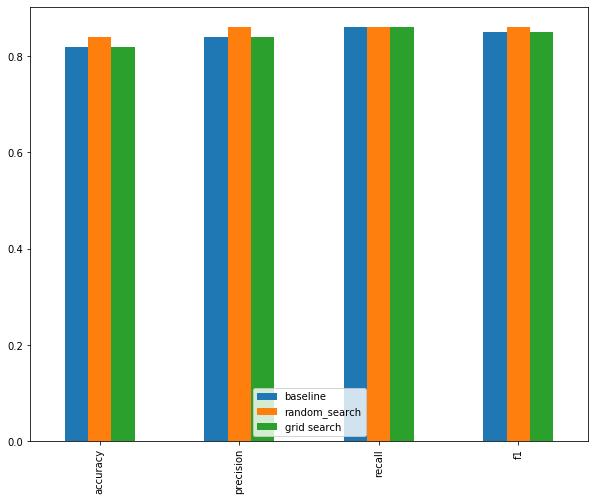

In [36]:
# Create a dataframe and compare the various models tried and how well they did
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                                 'random_search': rs_metrics,
                                 'grid search': gs_metrics})
compare_metrics.plot.bar(figsize = (10,8));